# CHAPTER 07.군집화
## 01. K-평균 알고리즘 이해

#### K-평균
: 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘. 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다.
- 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화 하는 기법이다.

- **K-평균의 장점** 
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
    - 알고리즘이 쉽고 간결하다
    

- **K-평균의 단점**
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다(PCA 차원 감소 적용 해야 할 수 있다.)
    - 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
    - 몇 개의 군집을 선택해야 할 지 가이드하기 어렵다.

### 사이킷런 KMeans 클래스 소개
- K-평균 구현하기 위해 **KMeans** 클래스 사용

In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                            precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
                            n_jobs=1, algorithm='auto')b

- **중요한 파라미터**
    - **n_clusters** : 군집화할 개수, 즉 군집 중심점의 개수를 의미한다. 가장 중요한 파라미터
    - **init** : 초기에 군집 중심점의 좌표를 설정할 방식. 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정한다.
    - **max_iter** : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
    

- **주요 속성 정보** (군집화 수행 완료 후)
    - **labels_** : 각 데이터 포인트가 속한 군집 중심점 레이블
    - **cluster_centers_** : 각 군집 중심점 좌표([군집개수, 피처개수]). 군집 중심점 좌표가 어디인지 시각화 할 수 있다.

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [2]:
# 붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트
# 필요한 모듈과 데이터 세트 로드

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 dataframe으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
# label_속성값 출력

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미한다.

In [5]:
# 실제 붓꽃 품종 분류값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인

irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
# group by를 이용해 target과 cluster값 개수 비교
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [7]:
# 붓꽃 데이터 세트의 군집화를 시각화

# 2차원 평면상에서 개별 데이터 군집화를 시각적으로 표현
# 속성이 4개이므로 2차원 평면에 적합하지 않아 PCA를 이용해 2개로 차원 축소한 뒤 X좌표, Y좌표로 개별 데이터 표현

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


pca_x는 X 좌표 값, pca_y는 Y 좌표 값을 나타낸다.

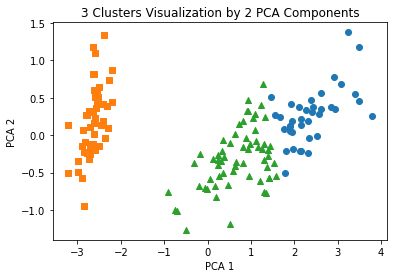

In [9]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

Cluster 1을 나타네는 네모(s)는 명확히 다른 군집과 잘 분리되어 있다. cluster 0을 나타내는 동그라미(o)와 Cluster 2를 나타내는 세모(^)는 상당 수준 분리돼 있지만, 네모만큼 명확하진 않다. 이 둘은 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재한다.

### 군집화 알고리즘 테스트를 위한 데이터 생성
#### 대표적인 군집화용 데이터 생성기 : make_blobs( ), make_classification( )
: 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성. 둘다 분류 용도 로도 테스트 데이터 생성 가능
- 차이점
    - make_blobs( ) : 개별 군집의 중심점과 표준 편차 제어기능 추가되어있음
    - make_classification( ) : 노이즈를 포함한 데이터를 만드는데 유용하게 사용할 수 있다.
    - 이외에 make_circle( ), make_moon( ) API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용

#### make_blobs( )
: 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환된다.
- 호출 파라미터
    - **n_samples** : 생성할 총 데이터의 개수(디폴트 100개)
    - **n_features** : 데이터의 피처 개수. 시각화가 목표이면 2개로 설정해 첫번째 피처는 x, 두 번째 피처는 y 좌표상에 표현한다.
    - **centers** : int값. 숫자로 설정하면 군집의 개수를 나타낸다. ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.
    - **cluster_std** : 생성될 군집 데이터의 표준편차를 의미. 데이터의 분포도를 조절한다. ndarray 형태일 경우 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들때 사용한다.(값이 작을수록 군집 중심에 데이터가 모여있으며 클수록 데이터가 퍼져있다.)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
# np.unique() : 주어진 넘파이 배열의 모든 고유 값을 겁색하고 이런 고유값을 정렬한다.
    # return_counts=True : 각 고유값의 개수 배열 반환
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지며, y는 200개의 레코드를 가진다. 3개의 클러스터의 값은 [0, 1, 2]이며, 각각 67, 67, 66개로 균일하게 구성되어 있다.

In [11]:
# 데이터 가공 편리하게 하기 위해 데이터프레임으로 변경

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


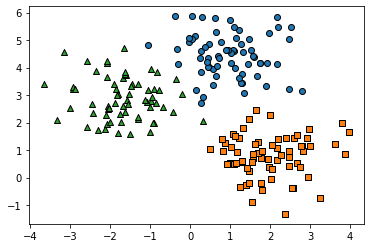

In [12]:
# make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인

target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list :
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

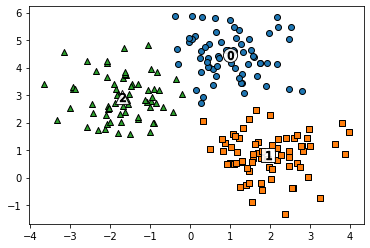

In [13]:
# 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤 군집별로 시각화 하기

# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels :
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
               edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)
    
plt.show()

In [14]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


거의 대부분 잘 매핑 되었다. 

## 02. 군집평가(Cluster Evaluation)

대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않다. 또한 군집화는 분류와 유사해 보일 수 있으나 성격이 많이 다르다. 그렇다면 군집화가 효율적으로 잘 됐는지 평가할 수 있는 지표에는 뭐가 있을까?

### 실루엣 분석의 개요
- **실루엣 분석(silhouette analysis)** : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 잇고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐잇다는 의미이다.
- 실루엣 분석은 **실루엣 계수(silhouettte coefficient)**를 기반으로 한다.
	- 개별 데이터가 가지는 군집화 지표이다. 
	- 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼있는지를 나타내는 지표이다. 

- s(i) = (b(i) - a(i)) / (max(a(i),b(i))
    - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
    - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
    - b(i) - a(i) : 두 군집간의 거리가 얼마나 떨어져 있는가
    - 이를 정규화 하기 위해 Max(a(i), b(i)) 값으로 나눈다.
    
 
- 실루엣 계수는 -1에서 1사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 잇다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다. -값은 아예 다른 군집에 데이터 포인트가 할당 됐음을 뜻한다.


- **사이킷런 실루엣 분석 메서드**
    - sklearn.metrics.silhouette_samples(X, labels, metric=‘euclidean’, **kwds) 
        - 인자로 X featrue 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환한다.
    - sklearn.metrics.silhouette_score(X, labels, metric=‘euclidean’, sample_size=None, **kwds)
        - 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환한다.
        - 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있다. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수 없다.

- **좋은 군집화가 되려면 다음 기준 조건을 만족해야 한다**
    1. 전체 실루엣 계수의 평균값, 즉, 사이킷런의 silhouette_score()값은 0~1사이의 값을 가지며, 1에 가까울수록 좋다.
    2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다.

### 붓꽃 데이터 세트를 이용한 군집 평가

In [1]:
# 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepla_length', 'sepla_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepla_length,sepla_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [2]:
# 군집별 평균 실루엣 계수 값 알아보기

irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 0.45, 2번은 0.41로 상대적으로 평균값이 1번에 비해 낮다.

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법 
전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없다. 개별 군집별로 적당히 분리된 거리를 윻지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우에 K-평균의 적절한 군집개수가 설정됐다고 판단할 수 있다.

In [3]:
### 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때 개별 군집별 평균 실루엣 계수 값을 시각화해 군집의 개수를 정하는데 도움을 준다.
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

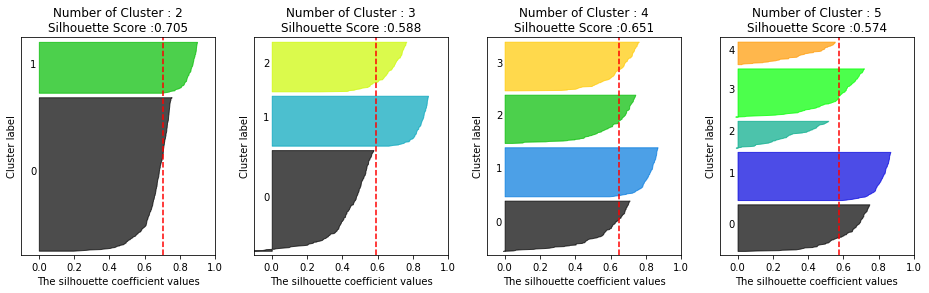

In [5]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개 , 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

4개의 군집일때 가장 최적이다.

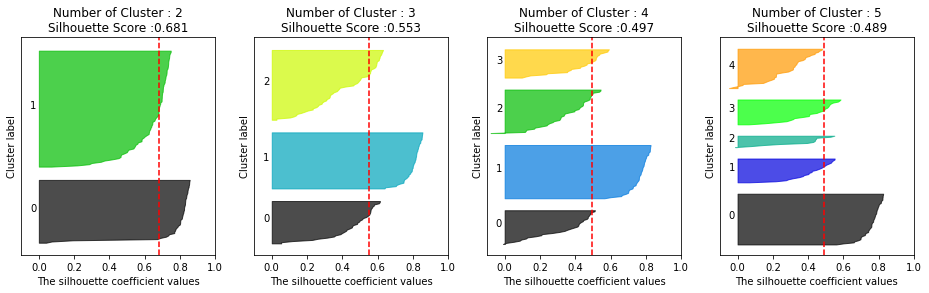

In [6]:
# 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수

from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

붓꽃 데이터를 K-평균으로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아 보인다.다른 경우는 실루엣 계수 편차가 크다.

- **실루엣 계수를 통한 K-평균 군집 평가 방법**은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행시간이 크게 늘어난다. 따라서 이 경우, 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야한다.

## 03. 평균이동
### 평균 이동(Mean Shift)의 개요
: K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 하지만 평균 이동은 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시킨다.

- **평균이동의 장점**
	- 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다
	- 이상치의 영향력도 크지 않다
	- 미리 군집의 개수를 정할 필요가 없다.


- **평균이동의 단점**
	- 알고리즘의 수행시간이 오래걸릳나.
	- band-width의 크기에 따른 군집화 영향도가 매우 크다


- **평균이동의 이용**
	- 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용된다.
		- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행한다.

- **평균이동 설명**
- 확률 밀도 함수를 이용한다. 가장 집중적으로 데이터가 모여 있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE를 이용한다.
	- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE함수 값으로 입력한 뒤 그 반환값을 현재 위치에서 업데이트하면서 이동하는 방식이다.

- 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다. 
	- 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가진다.
	- 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.


- **대역폭**은 KDE형태를 부드러운(아님 뾰쪽한) 형태로 평활화하는데 적용된다. 이를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.
	- 작은 h값(1) : 좁고 뾰족한 KDE를 가진다. 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉽다.
	- 큰 h값(10) : 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 과소적합하기 쉽다.

- MeanShift 클래스 이용
	- bandwidth : 가장 중요한 초기화 파라미터. KDE의 대역폭 h와 동일. 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미친다.
		- estimate_bandwidth( ) : 최적의 대역폭을 계산해준다.

In [1]:
# make_blobs()의 cluster_std를 0.7로 정한 3개 군집의 데이터에 대해 
# bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘 적용한 예제

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster lables 유형:', np.unique(cluster_labels))

cluster lables 유형: [0 1 2 3 4 5]


군집이 0부터 5까지 6개로 분류됐다. 지나치게 세분화돼 군집되었다.

In [2]:
# bandwith 살짝 높여 MeanShift 수해

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster lables 유형:', np.unique(cluster_labels))

cluster lables 유형: [0 1 2]


3개의 군집으로 잘 군집화되었다.

In [3]:
# estimate_bandwitdth()함수 이용하여 최적화된 bandwidth 값 찾기

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [5]:
# 측정된 bandwidth를 평균 이동값으로 적용해 동일한 make_blobs()데이터 세트에 군집화 수행

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


<function matplotlib.pyplot.show(close=None, block=None)>

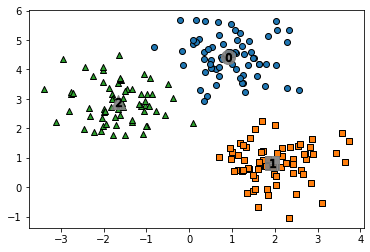

In [8]:
# 구성된 3개의 군집을 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)
    
plt.show

In [9]:
# target 값과 군집 label값 비교

print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


Target 값과 군집 label 값이 1:1로 잘 매칭되었다.

## 04. GMM(Gaussian Mixture Model)
### GMM(Gaussian Mixture Model) 소개
:  GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합 들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다.


이와 같은 방식은 GMM에서는 모수 추정이라고 하는대 대표적으로 2가지를 추정하는 것이다.
- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률


이러한 모수 추정을 위해 GMM은 EX(Expectation and Maximization) 방법을 적용한다.
- GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 **GaussianMixture 클래스**를 사용한다.
    - **가장 중요한 초기화 파라미터**
	- **n_components** : gaussian mixture의 모델의 총 개수. 군집의 개수를 정하는데 중요한 역할을 수행한다.

### GMM을 이용한 붓꽃 데이터 세트 군집화

In [4]:
# GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화이다. 
# 붓꽃 데이터 세트로 두 가지 방식을 이용해 군집화를 수행한 뒤 비교해보자

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [5]:
# n_componentsfmf 3으로 설정하고 GaussianMixutre로 군집화 수행

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


target 0은 cluster 0으로, Target 2는 cluster 1로 모두 잘 매핑됐다. Target 1만 cluster 2로 45개, cluster 1로 5개 매핑됐다. 앞의  K-평균 군집화 결과보다 더 효과적인 분류 걸과가 도출되었다.

In [6]:
# 붓꽃 데이터 세트의 K-평균 군집화 수행 결과

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


어떤 알고리즘이 더 뛰어나다는 의미가 아니라, 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미이다. K-평균은 개별 군집내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화를 수행할 수 있다.

### GMM과 K-평균의 비교

KMeans는 평균 거리 기반으로 군집화를 수행하므로 원형의 범위에서 군집화를 수행한다. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. 하지만 대표적으로 **데이터가 길쭉한 타원형으로 늘어선 겨웅에 군집화를 잘 수행하지 못한다.**

In [7]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

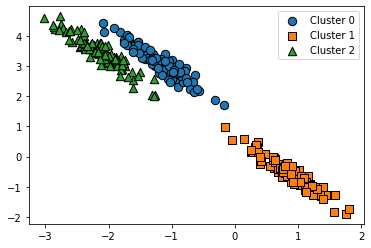

In [8]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y결괏값을 데이터프레임으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

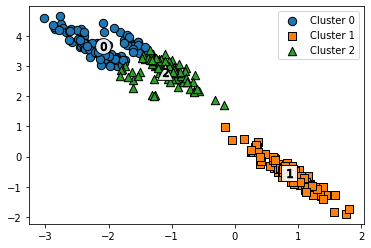

In [11]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성 되지 않음을 알 수 있다.

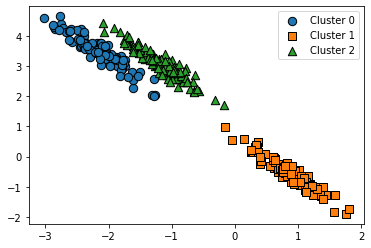

In [12]:
# 3개의 n_components 기반을 GMM X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_속성이 없으므로(군집 중심 좌표 구할 수 없음) iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

데이터가 분포된 방향에 따라 정확하게 군집화됐음을 알 수 있다. 

In [13]:
# make_blobs()의 target값과 KMeans, GMM 군집 Label값을 서로 비교하여
# 위와 같은 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인

print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


KMeans의 경우 군집 1번을 제외하고는 target값과 어긋나는 경우가 발생하고 있다. GMM의 경우 군집이 target값과 잘 매핑되어 있다.


이렇게 GMM의 경우는 KMeans보다 유연하게 다양한 세트에서 잘 적용될 수 있다는 장점이 있다. 하지만 군집화를 위해 수행시간이 오래걸린다는 단점이 있다.